In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/indian-stat/Indian_states.shp
/kaggle/input/indian-stat/Indian_states.prj
/kaggle/input/indian-stat/Indian_states.dbf
/kaggle/input/indian-stat/Indian_states.shx
/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/

In [2]:
case = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2012.csv')
print(case.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201508017692012  2012           1          1         1   
1  01-01-01-201508017702012  2012           1          1         1   
2  01-01-01-201608017612012  2012           1          1         1   
3  01-01-01-201908000012012  2012           1          1         1   
4  01-01-01-201908000022012  2012           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030013192012  chief judicial magistrate           0 male   
1  MHNB030013202012  chief judicial magistrate           0 male   
2  MHNB030012922012  chief judicial magistrate           0 male   
3  MHNB030000162012  chief judicial magistrate           0 male   
4  MHNB030000122012  chief judicial magistrate           0 male   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0     -9998 unclear           -9998           -9999       5682           NaN   
1     -9998 uncl

In [3]:
acts_sec = pd.read_csv('/kaggle/input/pre-cog/acts_sections/acts_sections.csv')

mer_1 = case.merge(acts_sec, left_on = "ddl_case_id", right_on = "ddl_case_id", how = "left")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(mer_1.iloc[900403:900440,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
900403  01-37-02-203601009272012  2012           1         37         2   
900404  01-37-02-203601009282012  2012           1         37         2   
900405  01-37-02-203601009292012  2012           1         37         2   
900406  01-37-02-203601009302012  2012           1         37         2   
900407  01-37-02-203601009312012  2012           1         37         2   
900408  01-37-02-203601009322012  2012           1         37         2   
900409  01-37-02-203601009332012  2012           1         37         2   
900410  01-37-02-203601009342012  2012           1         37         2   
900411  01-37-02-203601009352012  2012           1         37         2   
900412  01-37-02-203601009362012  2012           1         37         2   
900413  01-37-02-203601009372012  2012           1         37         2   
900414  01-37-02-203601009382012  2012           1         37         2   
900415  01-37-02-20360100

In [5]:
mer_1.to_csv('cases_2012_mer.csv', index="false")

In [6]:
state = pd.read_csv('/kaggle/input/pre-cog/keys/cases_state_key.csv')

In [7]:
state_arr = state[state.columns[1:3]].values.tolist()
set(tuple(element) for element in state_arr)
state_x = [list(t) for t in set(tuple(element) for element in state_arr)]

In [8]:
print(state_x)

[[6, 'Assam'], [7, 'Jharkhand'], [18, 'Chhattisgarh'], [3, 'Karnataka'], [23, 'Madhya Pradesh'], [16, 'West Bengal'], [24, 'Sikkim'], [9, 'Rajasthan'], [22, 'Punjab'], [21, 'Meghalaya'], [32, 'DNH at Silvasa'], [20, 'Tripura'], [33, 'Ladakh'], [19, 'Mizoram'], [31, 'Diu and Daman'], [27, 'Chandigarh'], [5, 'Himachal Pradesh'], [2, 'Andhra Pradesh'], [15, 'Uttarakhand'], [10, 'Tamil Nadu'], [13, 'Uttar Pradesh'], [12, 'Jammu and Kashmir'], [4, 'Kerala'], [25, 'Manipur'], [14, 'Haryana'], [11, 'Orissa'], [8, 'Bihar'], [17, 'Gujarat'], [26, 'Delhi'], [30, 'Goa'], [29, 'Telangana'], [1, 'Maharashtra']]


In [9]:
states = pd.DataFrame(state_x, columns = ['state_code', 'state'])

In [10]:
print(states)

    state_code              state
0            6              Assam
1            7          Jharkhand
2           18       Chhattisgarh
3            3          Karnataka
4           23     Madhya Pradesh
5           16        West Bengal
6           24             Sikkim
7            9          Rajasthan
8           22             Punjab
9           21          Meghalaya
10          32     DNH at Silvasa
11          20            Tripura
12          33             Ladakh
13          19            Mizoram
14          31      Diu and Daman
15          27         Chandigarh
16           5   Himachal Pradesh
17           2     Andhra Pradesh
18          15        Uttarakhand
19          10         Tamil Nadu
20          13      Uttar Pradesh
21          12  Jammu and Kashmir
22           4             Kerala
23          25            Manipur
24          14            Haryana
25          11             Orissa
26           8              Bihar
27          17            Gujarat
28          26

In [11]:
mer_2 = mer_1.merge(states, left_on = "state_code", right_on = "state_code", how = "left")

In [12]:
print(mer_2.iloc[899394:900001,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
899394  01-37-02-202201001282012  2012           1         37         2   
899395  01-37-02-202201001292012  2012           1         37         2   
899396  01-37-02-202201001302012  2012           1         37         2   
899397  01-37-02-202201001312012  2012           1         37         2   
899398  01-37-02-202201001322012  2012           1         37         2   
...                          ...   ...         ...        ...       ...   
899996  01-37-02-203601005162012  2012           1         37         2   
899997  01-37-02-203601005172012  2012           1         37         2   
899998  01-37-02-203601005182012  2012           1         37         2   
899999  01-37-02-203601005192012  2012           1         37         2   
900000  01-37-02-203601005202012  2012           1         37         2   

                    cino                 judge_position female_defendant  \
899394  MHCC02009249201

In [13]:
state_count = mer_2.groupby('state').count().reset_index()

In [14]:
print(state_count)

                state  ddl_case_id    year  state_code  dist_code  court_no  \
0      Andhra Pradesh       180811  180811      180811     180811    180811   
1               Assam        91339   91339       91339      91339     91339   
2               Bihar       217541  217541      217541     217541    217541   
3          Chandigarh        19580   19580       19580      19580     19580   
4        Chhattisgarh        76565   76565       76565      76565     76565   
5      DNH at Silvasa          790     790         790        790       790   
6               Delhi       114464  114464      114464     114464    114464   
7       Diu and Daman         1332    1332        1332       1332      1332   
8                 Goa        26638   26638       26638      26638     26638   
9             Gujarat       453985  453985      453985     453985    453985   
10            Haryana       223754  223754      223754     223754    223754   
11   Himachal Pradesh        62039   62039       620

In [15]:
state_count.replace("Orissa", 
           "Odisha", 
           inplace=True)

state_count.replace("DNH at Silvasa", 
           "Dadara & Nagar Havelli", 
           inplace=True)

state_count.replace("Diu and Daman", 
           "Daman & Diu", 
           inplace=True)

state_count.replace("Jammu and Kashmir", 
           "Jammu & Kashmir", 
           inplace=True)

state_count.replace("Delhi", 
           "NCT of Delhi", 
           inplace=True)

print(state_count)

                     state  ddl_case_id    year  state_code  dist_code  \
0           Andhra Pradesh       180811  180811      180811     180811   
1                    Assam        91339   91339       91339      91339   
2                    Bihar       217541  217541      217541     217541   
3               Chandigarh        19580   19580       19580      19580   
4             Chhattisgarh        76565   76565       76565      76565   
5   Dadara & Nagar Havelli          790     790         790        790   
6             NCT of Delhi       114464  114464      114464     114464   
7              Daman & Diu         1332    1332        1332       1332   
8                      Goa        26638   26638       26638      26638   
9                  Gujarat       453985  453985      453985     453985   
10                 Haryana       223754  223754      223754     223754   
11        Himachal Pradesh        62039   62039       62039      62039   
12         Jammu & Kashmir        2896

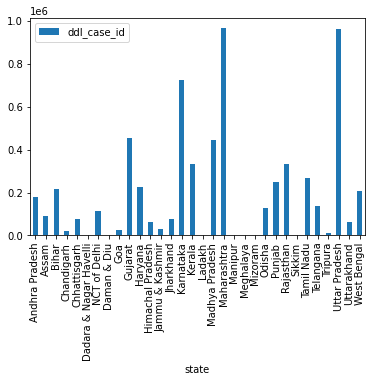

In [16]:
state_count.plot(x="state",y="ddl_case_id", kind="bar")
plt.pyplot.savefig('state_bar_2012.png')

In [17]:
shp = gpd.read_file('/kaggle/input/indian-stat/Indian_states.shp')
state_map = shp.set_index('st_nm').join(state_count.set_index('state'))
print(state_map)

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   
Chhattisgarh              POLYGON ((83.33532 24.09885, 83.35346 24.09627...   
Dadara & Nagar Havelli    POLYGON ((73.20657 20.12216, 73.20797 20.10650...   
Daman & Diu               MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...   
Goa                       MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...   
Gujarat                   MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...   
Haryana                   POLYGON ((76.85065 30.8751

In [18]:
 state_map['ddl_case_id'] = state_map['ddl_case_id'].fillna(0)

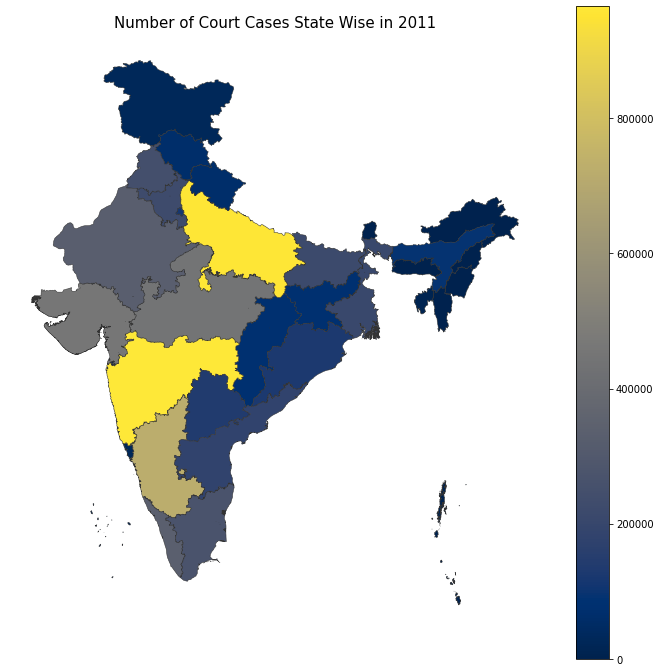

In [19]:
fig, ax = plt.pyplot.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Number of Court Cases State Wise in 2011',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = state_map.plot(column='ddl_case_id', cmap='cividis', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

plt.pyplot.savefig('state_map_2012.png')

In [20]:
state_2012 = state_map.iloc[:,[1]]
print(state_2012)

                          ddl_case_id
st_nm                                
Andaman & Nicobar Island          0.0
Arunanchal Pradesh                0.0
Assam                         91339.0
Bihar                        217541.0
Chandigarh                    19580.0
Chhattisgarh                  76565.0
Dadara & Nagar Havelli          790.0
Daman & Diu                    1332.0
Goa                           26638.0
Gujarat                      453985.0
Haryana                      223754.0
Himachal Pradesh              62039.0
Jammu & Kashmir               28960.0
Jharkhand                     76004.0
Karnataka                    724072.0
Kerala                       335315.0
Lakshadweep                       0.0
Madhya Pradesh               443869.0
Maharashtra                  965560.0
Manipur                        2325.0
Meghalaya                      2719.0
Mizoram                        1866.0
Nagaland                          0.0
NCT of Delhi                 114464.0
Puducherry  

In [21]:
state_2012.to_csv('state_2012.csv')